In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import optimize
from scipy.optimize import minimize

random.seed(1917)
np.random.seed(1917)

# 1

In [9]:
def cubic(x):
    return x**3

def module(x):
    return abs(x - 0.2)

def sin1x(x):
    return x * np.sin(1/x)

In [10]:
vec = np.random.uniform(0, 1, 1000)
vec_sin = np.random.uniform(0.01, 1, 1000)

## exhaustive search

In [38]:
def exhaustive_search(x, a, b, fun, error=0.001):
    iters = 0
    x_i = np.zeros((x.size+1,))
    for i in range(len(x)+1):
        x_i[i] = a + i * ((b-a) / (len(x)))
        iters += 1

    f_x = fun(x_i)
    x_m = f_x[0]
    for i in range(1, len(f_x)):
        if f_x[i] < x_m:
            x_m = f_x[i]
            iters += 1

    print('iterations:', iters, '| func: len(x) |', 'len(x):', len(x))
        
    return x_m

In [34]:
exhaustive_search(vec, 0, 1, cubic)

iterations: 1001 | func: len(x) | len(x): 1000


0.0

In [32]:
exhaustive_search(vec, 0, 1, module)

iterations: 1201 | func: len(x) | len(x): 1000


0.0

In [38]:
exhaustive_search(vec_sin, 0.01, 1, sin1x)

iterations: 1069 | func: len(x) | len(x): 1000


-0.21722960129123117

## dichotomy

In [76]:
def dichotomy(a, b, fun, error=0.001):
    iters = 0
    func = 0
    delta = 0.0005
    while abs(a - b) >= error:
        iters +=1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        func += 2
        if fun(x1) <= fun(x2):
            b = x2
        else:
            a = x1

    print('iters:', iters, 'func:', func)
    return fun((a + b) / 2)
    

In [77]:
dichotomy(0, 1, cubic)

iters: 11 func: 22


1.2056736854538035e-10

In [78]:
dichotomy(0, 1, module)

iters: 11 func: 22


0.0001011962890624385

In [79]:
dichotomy(0.01, 1, sin1x)

iters: 11 func: 22


-0.21723352556119732

## golden section

In [11]:
def golden_section(a, b, fun, error=0.001):
    iters = 0
    func = 0

    while abs(a - b) > error:
        iters +=1
        func += 1
        x1 = a + (3 - np.sqrt(5))/2 * (b - a)
        x2 = b + (np.sqrt(5) - 3)/2 * (b - a)
        if fun(x1) <= fun(x2):
            b = x2
            x2 = x1

        else:
            a = x1
            x1 = x2

    print('iters:', iters, 'func:', func)
    return fun((a + b) / 2)
    

In [12]:
golden_section(0,1,cubic)

iters: 15 func: 15


4.9256800857728645e-11

In [14]:
golden_section(0,1,module)

iters: 15 func: 15


7.331374358574005e-05

In [61]:
golden_section(0.01, 1, sin1x)

iters: 15 func: 15


-0.2172323281775325

# 2

In [2]:

alpha = random.uniform(0, 1)
beta = random.uniform(0, 1)

x = np.array([i/100 for i in range(100)])
y = np.array([alpha * x[i] + beta + np.random.standard_normal(1) for i in range(100)])

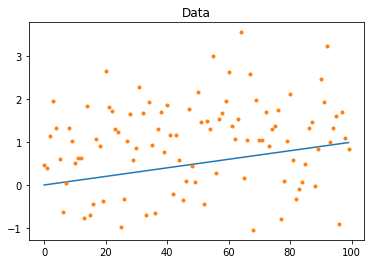

In [16]:
plt.plot(x)
plt.plot(y, '.')
plt.title('Data')

In [4]:
def loss_linear(a, x_=x, y_=y):
    a, b = a
    return sum([((a * x_[i] + b) - y_[i])**2 for i in range(len(x_))])

def loss_rational(a, x_=x, y_=y):
    a, b = a
    return sum([(a / (1 + b * x_[i]) - y_[i])**2 for i in range(len(x_))])

## exhaustive search

In [17]:
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
brute_lin = optimize.brute(loss_linear, rranges, full_output=True, disp=True)

Optimization terminated successfully.
         Current function value: 94.423449
         Iterations: 22
         Function evaluations: 43


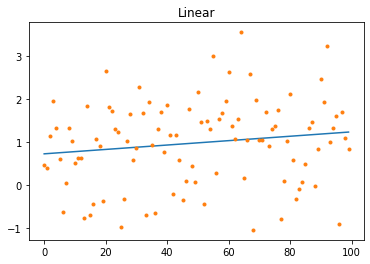

In [18]:
plt.plot(brute_lin[0][0] * x + brute_lin[0][1])
plt.plot(y, '.')
plt.title('Linear')

In [19]:
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
brute_rat = optimize.brute(loss_rational, rranges, full_output=True, finish=optimize.fmin, disp=True)

Optimization terminated successfully.
         Current function value: 94.754845
         Iterations: 46
         Function evaluations: 89


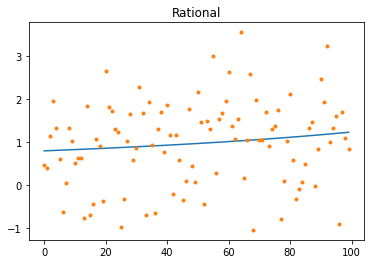

In [20]:
plt.plot(brute_rat[0][0] / (1 + brute_rat[0][1] * x))
plt.plot(y, '.')
plt.title('Rational')

## Nelder-Mead

In [21]:
x0 = np.array([1, 1])
linear_nelder = minimize(loss_linear, x0, method='nelder-mead', tol=0.001)

In [22]:
linear_nelder

 final_simplex: (array([[0.51283198, 0.72710758],
       [0.51216016, 0.7273255 ],
       [0.51348167, 0.7266697 ]]), array([94.4234499 , 94.42345207, 94.42345309]))
           fun: 94.42344990230738
       message: 'Optimization terminated successfully.'
          nfev: 64
           nit: 33
        status: 0
       success: True
             x: array([0.51283198, 0.72710758])

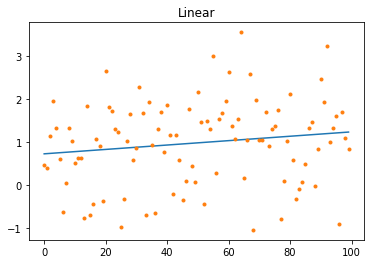

In [23]:
plt.plot(linear_nelder.x[0] * x + linear_nelder.x[1])
plt.plot(y, '.')
plt.title('Linear')

In [24]:
x0 = np.array([1, 1])
rat_nelder = minimize(loss_rational, x0, method='nelder-mead', tol=0.001)

In [25]:
rat_nelder

 final_simplex: (array([[ 0.79624564, -0.35637927],
       [ 0.79673103, -0.35573972],
       [ 0.79651156, -0.35634326]]), array([94.75484739, 94.75484895, 94.75485336]))
           fun: 94.75484738825936
       message: 'Optimization terminated successfully.'
          nfev: 68
           nit: 37
        status: 0
       success: True
             x: array([ 0.79624564, -0.35637927])

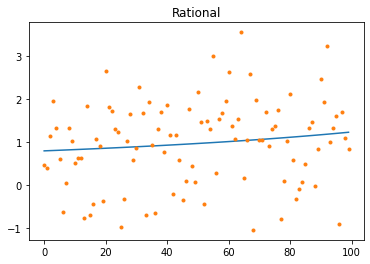

In [26]:
plt.plot(rat_nelder.x[0] / (1 + rat_nelder.x[1] * x))
plt.plot(y, '.')
plt.title('Rational')

## Gauss

In [0]:
a0 = 1
b0 = 1
b1 = 1000
iters = 0
func = 0
while True:
    iters += 2
    list_a = []

    for a in range(1000):
        func += 1
        a = a / 1000
        list_a.append(loss_linear((a, b0)))

    a1 = np.argmin(list_a) / 1000

    if abs(a0 - a1) < 0.001 and abs(b0 - b1) < 0.001:
        break
    a0 = a1

    list_b = []
    for b in range(1000):
        func += 1
        b = b / 1000
        list_b.append(loss_linear((a0, b)))

    b1 = np.argmin(list_b) / 1000

    if abs(b0 - b1) < 0.001 and abs(a0 - a1) < 0.001:
        break
    b0 = b1

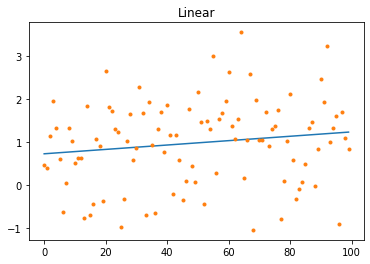

In [28]:
plt.plot(a0 * x + b0)
plt.plot(y, '.')
plt.title('Linear')

In [6]:
func, iters

(36000, 36)

In [34]:
a0 = 1
b0 = 1
b1 = 1000
iters = 0
func = 0
while True:
    iters += 2
    list_a = []

    for a in range(1000):
        func += 1
        a = a / 1000
        list_a.append(loss_rational((a, b0)))

    a1 = np.argmin(list_a) / 1000

    if abs(a0 - a1) < 0.001 and abs(b0 - b1) < 0.001:
        break
    a0 = a1

    list_b = []
    for b in range(1000):
        func += 1
        b = b / 1000
        list_b.append(loss_rational((a0, b)))

    b1 = np.argmin(list_b) / 1000

    if abs(b0 - b1) < 0.001 and abs(a0 - a1) < 0.001:
        break
    b0 = b1

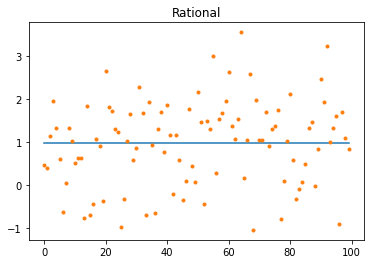

In [30]:
plt.plot(a0 / (1 + b0 * x))
plt.plot(y, '.')
plt.title('Rational')

In [8]:
iters, func

(4, 4000)

## Comparison

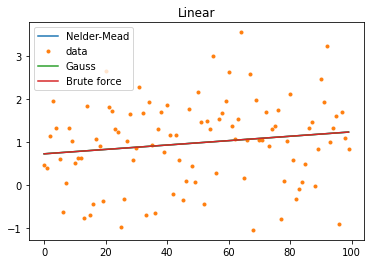

In [33]:
plt.plot(linear_nelder.x[0] * x + linear_nelder.x[1], label='Nelder-Mead')
plt.plot(y, '.', label='data')
plt.plot(a0 * x + b0, label='Gauss')
plt.plot(brute_lin[0][0] * x + brute_lin[0][1], label='Brute force')
plt.legend()
plt.title('Linear')

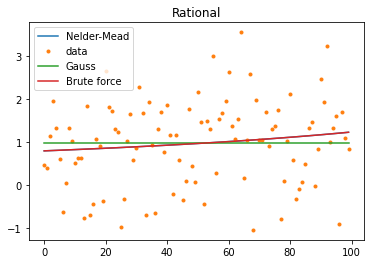

In [36]:
plt.plot(rat_nelder.x[0] / (1 + rat_nelder.x[1] * x), label='Nelder-Mead')
plt.plot(y, '.', label='data')
plt.plot(a0 / (1 + b0 * x), label='Gauss')
plt.plot(brute_rat[0][0] / (1 + brute_rat[0][1] * x), label='Brute force')
plt.legend()
plt.title('Rational')